#Installation

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3MB 10.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=60b4d748d00133f1f3dc5e2fcd87593ce97715f63321b4e8d77de8c1d7210158
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
!pip install tensorflow

In [3]:
! pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [4]:
pip install arch

     |████████████████████████████████| 808kB 8.5MB/s 


In [5]:
pip install prophet

     |████████████████████████████████| 71kB 4.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 184kB 12.6MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640420 sha256=53b2afca99fb8c13ccf8ecbb9905ad0dfd4d4321e632c499f6ebea84075bdfae
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [6]:
pip install fbprophet --no-cache

ERROR: prophet 1.0.1 has requirement cmdstanpy==0.9.68, but you'll have cmdstanpy 0.9.5 which is incompatible.
  Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


In [7]:
pip install pystan --no-cache

In [8]:
#Manual install talib on googlecolab
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3713    0  3713    0     0   7816      0 --:--:-- --:--:-- --:--:--  7800
100  503k  100  503k    0     0   451k      0  0:00:01  0:00:01 --:--:--  451k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3729    0  3729    0     0   8159      0 --:--:-- --:--:-- --:--:--  8141
100  406k  100  406k    0     0   378k      0  0:00:01  0:00:01 --:--:--  378k


#Import Libraries and Dependencies

In [9]:
from pathlib import Path
from datetime import date
from arch import arch_model
from statistics import mean
from sklearn import metrics
from tensorflow import keras
from matplotlib import pyplot
from fbprophet import Prophet
from datetime import datetime
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from IPython.display import Image
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.arima_model import ARIMA
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
import time
import talib
import datetime
import requests
import warnings
import pydotplus
import tensorflow 
import numpy as np
import pandas as pd
import arch as arch
import datetime as dt
import seaborn as sns
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
warnings.filterwarnings("ignore")
%matplotlib inline

#Set Ticker Module, Index, DataFrame

In [11]:
#Identifying the Ticker we want to analyize 
ticker = 'AAPL'

# Assign start and end dates
start_time = datetime.datetime(2019, 1, 1)
end_time = datetime.datetime.now().date().isoformat()

# Historical Time Series Data
ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
ticker_df = ticker_df.reset_index()

# Define DataFrame
df = ticker_df

# Reset "Date" as Index 
df.set_index("Date",inplace=True)

# Display DataFrame
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466
...,...,...,...,...,...,...
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,130.479996


#Calculated and added indicators: RSI, MACD, CMF

In [12]:
#Calculate RSI
def computeRSI (data, time_window):
    diff = data.diff(1).dropna() 
    up_chg = 0 * diff
    down_chg = 0 * diff
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [13]:
#Calculate MACD
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df["Close"]
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df

In [14]:
#Here we set the time-window to 14 days
df['RSI'] = computeRSI(df['Close'], 20)

#Here we are computing the MACD (12-day for fast period, 26-Days for slow period, and 9 Days period to smooth data)
df = computeMACD(df, 12, 26, 9)

#Here we are calculating the percent Change between 1 a day period
df['daily_returns']=df['Close'].pct_change()

#Here we are calculating the rolling-20 day std on daily returns
df['rolling_returns_std']= df['daily_returns'].rolling(window=20).std()

#Here we are calculating the Chakin Money Flow Indicator with a 21-day Window period
df['money_flow_volume'] = (df['Close'] - df['Low'] - (df['High'] - df['Close']))/(df['High'] - df['Low']) * df['Volume']
df['wp_sum_of_money_flow_volume'] = df['money_flow_volume'].rolling(window=21).sum()
df['wp_sum_of_volume'] = df['Volume'].rolling(window=21).sum()
df['CMF'] = df['wp_sum_of_money_flow_volume'] / df['wp_sum_of_volume']

df.head(2)

,High,Low,Open,Close,Volume,Adj Close,RSI,MACD,MACDsig,MACDhist,daily_returns,rolling_returns_std,money_flow_volume,wp_sum_of_money_flow_volume,wp_sum_of_volume,CMF
Date,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735,NaN,NaN,NaN,NaN,NaN,NaN,8.851008e+07,NaN,NaN,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851,NaN,NaN,NaN,NaN,-0.099607,NaN,-3.279380e+08,NaN,NaN,NaN


#Plot Adj Close, RSI, MACD, CMF

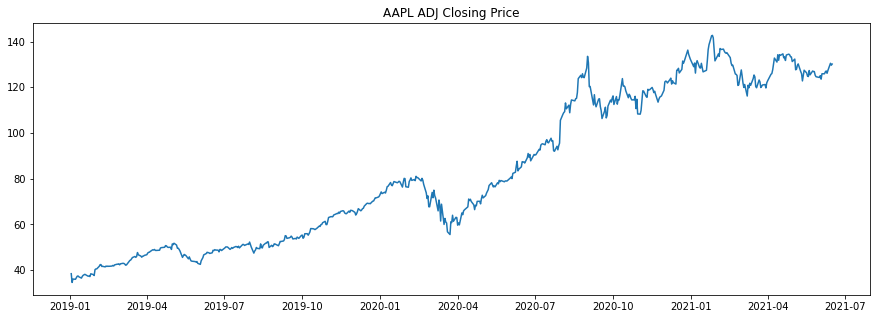

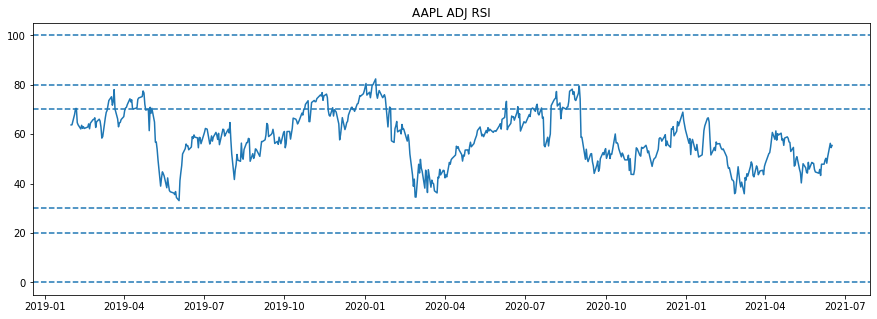

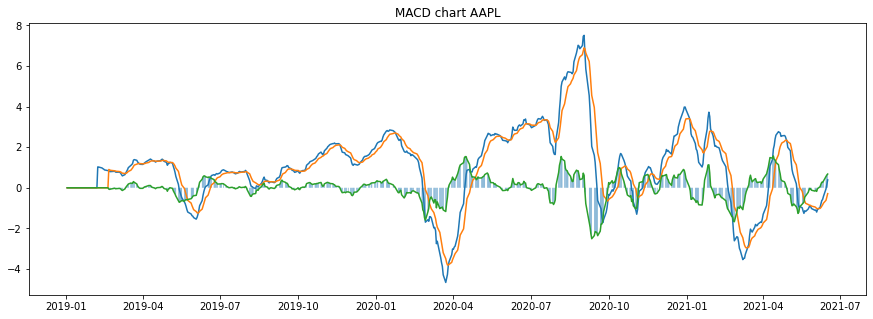

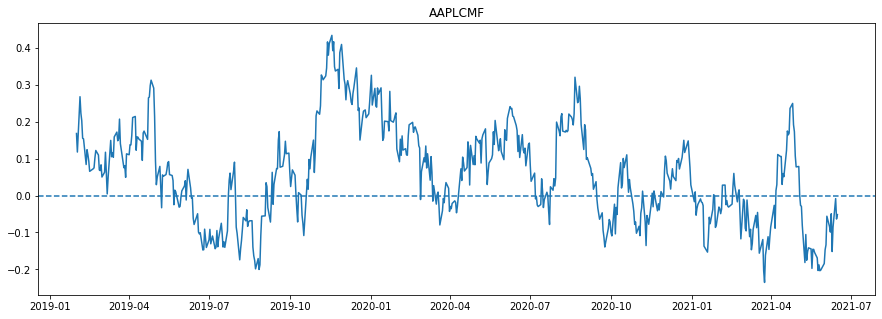

In [15]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Adj Close'])
plt.title(ticker +' ADJ Closing Price')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title(ticker +' ADJ RSI')
plt.plot(df.index, df['RSI'])

#When RSI values are:
#above 70, asset is considered overbought (overvalued)
#below 30, asset is considered oversold (undervalued)

plt.axhline(0, linestyle='--')
plt.axhline(20, linestyle='--')
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--')
plt.axhline(100, linestyle='--')

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('MACD chart ' + str(ticker))
plt.plot(df.index, df['MACD'].fillna(0))
plt.plot(df.index, df['MACDsig'].fillna(0))
plt.plot(df.index, df['MACDhist'].fillna(0))
plt.bar(df.index, df['MACDhist'].fillna(0), width=0.5, snap=False)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index, df['CMF'])
plt.title(ticker +'CMF')
plt.axhline(0, linestyle='--')
plt.show()


#Save dataframe to csv

In [16]:
#Save dataframe to csv
df.to_csv('ticker_data.csv')

In [17]:
#Read csv file
df2 = pd.read_csv(
    Path("ticker_data.csv"),
    index_col="Date",
    infer_datetime_format=True,
    parse_dates=True,
    
)

#Data Cleanup

In [18]:
df2 = df.drop(columns=["High","Low","Open","Volume","Adj Close","MACDsig","MACD","rolling_returns_std","money_flow_volume","wp_sum_of_money_flow_volume","wp_sum_of_volume"])
df2 = df2.dropna().copy()
df2


,Close,RSI,MACDhist,daily_returns,CMF
Date,,,,,
2019-02-20,43.007500,64.178698,-0.064438,0.006435,0.075176
2019-02-21,42.764999,62.199045,-0.079396,-0.005639,0.102604
2019-02-22,43.242500,64.470606,-0.064312,0.011166,0.122272
2019-02-25,43.557499,65.893805,-0.040811,0.007284,0.109919
2019-02-26,43.582500,66.007566,-0.030396,0.000574,0.069502
...,...,...,...,...,...
2021-06-10,126.110001,48.259845,0.263908,-0.008023,-0.151756
2021-06-11,127.349998,50.739970,0.331663,0.009833,-0.086240
2021-06-14,130.479996,56.305107,0.563400,0.024578,-0.008282


#Model 1 Forecasting the Stock Price using LSTM


In [19]:
#Set index Date as str
df2.index = df2.index.astype(str)

In [20]:
# Importing Training Set
dataset_train = df2

# Select features (columns) to be involved intr
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[0:5]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train.index)
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (586, 5)
All timestamps == 586
Featured selected: ['Close', 'RSI', 'MACDhist', 'daily_returns', 'CMF']


In [21]:
#Create array for LSTM model to run
df3 = df2.select_dtypes(include=float).to_numpy()
df3

array([[ 4.30074997e+01,  6.41786982e+01, -6.44378999e-02,
         6.43541889e-03,  7.51761272e-02],
       [ 4.27649994e+01,  6.21990445e+01, -7.93956529e-02,
        -5.63855855e-03,  1.02604347e-01],
       [ 4.32425003e+01,  6.44706057e+01, -6.43122926e-02,
         1.11656944e-02,  1.22271783e-01],
       ...,
       [ 1.30479996e+02,  5.63051070e+01,  5.63399745e-01,
         2.45779136e-02, -8.28230536e-03],
       [ 1.29639999e+02,  5.45637212e+01,  6.31128488e-01,
        -6.43774038e-03, -6.36201205e-02],
       [ 1.30149994e+02,  5.54443929e+01,  6.77224734e-01,
         3.93392864e-03, -5.15773994e-02]])

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(df3)

sc_predict = StandardScaler()
sc_predict.fit_transform(df3[:, 0:1])

array([[-1.36354619],
       [-1.37118249],
       [-1.35614606],
       [-1.34622681],
       [-1.34543952],
       [-1.34118844],
       [-1.35472908],
       [-1.34040115],
       [-1.33347335],
       [-1.33599259],
       [-1.34394373],
       [-1.35984613],
       [-1.35661839],
       [-1.30946245],
       [-1.29363873],
       [-1.28734074],
       [-1.27143846],
       [-1.2526233 ],
       [-1.23766555],
       [-1.24939556],
       [-1.23656341],
       [-1.18200734],
       [-1.21381202],
       [-1.23199738],
       [-1.24734876],
       [-1.23412297],
       [-1.23215486],
       [-1.22247177],
       [-1.21231623],
       [-1.19043081],
       [-1.17996043],
       [-1.17728382],
       [-1.16697092],
       [-1.14256625],
       [-1.14728978],
       [-1.13847266],
       [-1.15161965],
       [-1.15224946],
       [-1.14941537],
       [-1.14925789],
       [-1.11871272],
       [-1.11296586],
       [-1.10769132],
       [-1.0844676 ],
       [-1.08698672],
       [-1

In [23]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 7     # Number of days we want top predict into the future
n_past = 100     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (480, 100, 4).
y_train shape == (480, 1).


In [24]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=3e-4), loss='mean_squared_error')

In [25]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=50, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
2/2 [==============================] - 5s 1s/step - loss: 0.7017 - val_loss: 1.2811

Epoch 00001: val_loss improved from inf to 1.28113, saving model to weights.h5
Epoch 2/50
2/2 [==============================] - 0s 183ms/step - loss: 0.6437 - val_loss: 1.2050

Epoch 00002: val_loss improved from 1.28113 to 1.20502, saving model to weights.h5
Epoch 3/50
2/2 [==============================] - 0s 187ms/step - loss: 0.5898 - val_loss: 1.1353

Epoch 00003: val_loss improved from 1.20502 to 1.13525, saving model to weights.h5
Epoch 4/50
2/2 [==============================] - 0s 191ms/step - loss: 0.5556 - val_loss: 1.0682

Epoch 00004: val_loss improved from 1.13525 to 1.06816, saving model to weights.h5
Epoch 5/50
2/2 [==============================] - 0s 193ms/step - loss: 0.4924 - val_loss: 1.0030

Epoch 00005: val_loss improved from 1.06816 to 1.00302, saving model to weights.h5
Epoch 6/50
2/2 [==============================] - 0s 213ms/step - loss: 0.4648 - val_loss: 0.9388

In [26]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [27]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [28]:
from datetime import datetime
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Close']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTIONS_FUTURE.head(10)

,Close
2021-06-16,122.693024
2021-06-17,122.444374
2021-06-18,122.130791
2021-06-19,121.866905
2021-06-20,121.607590
2021-06-21,121.408875
2021-06-22,121.469139


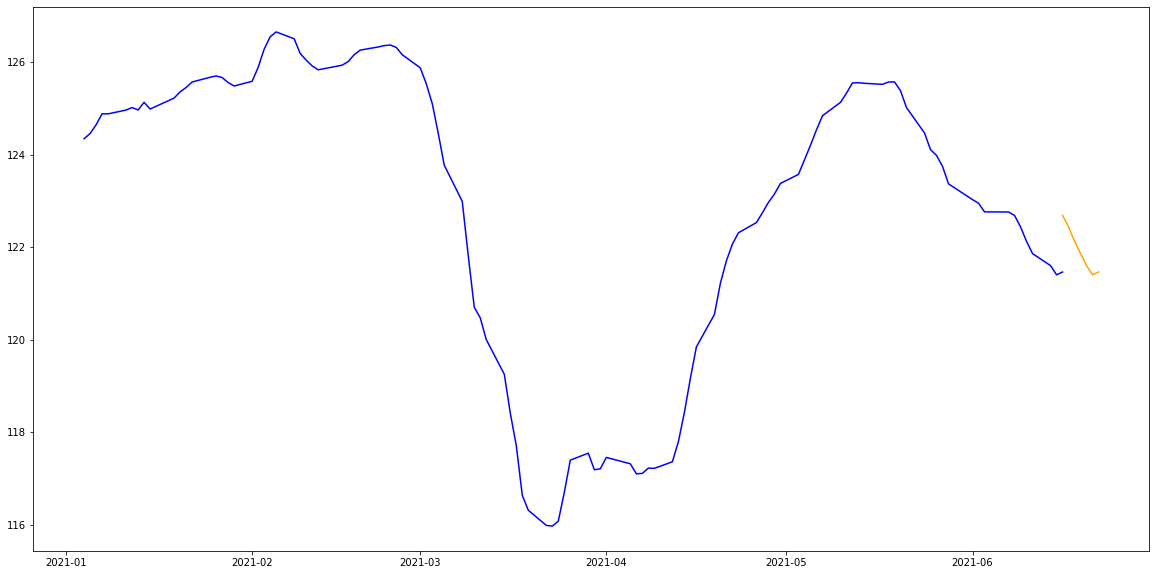

In [29]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# Plot parameters
START_DATE_FOR_PLOTTING = '2021-01-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='orange', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Close'], color='Blue', label='Training predictions')


#Model 2 Forecasting the Stock Price using ARIMA

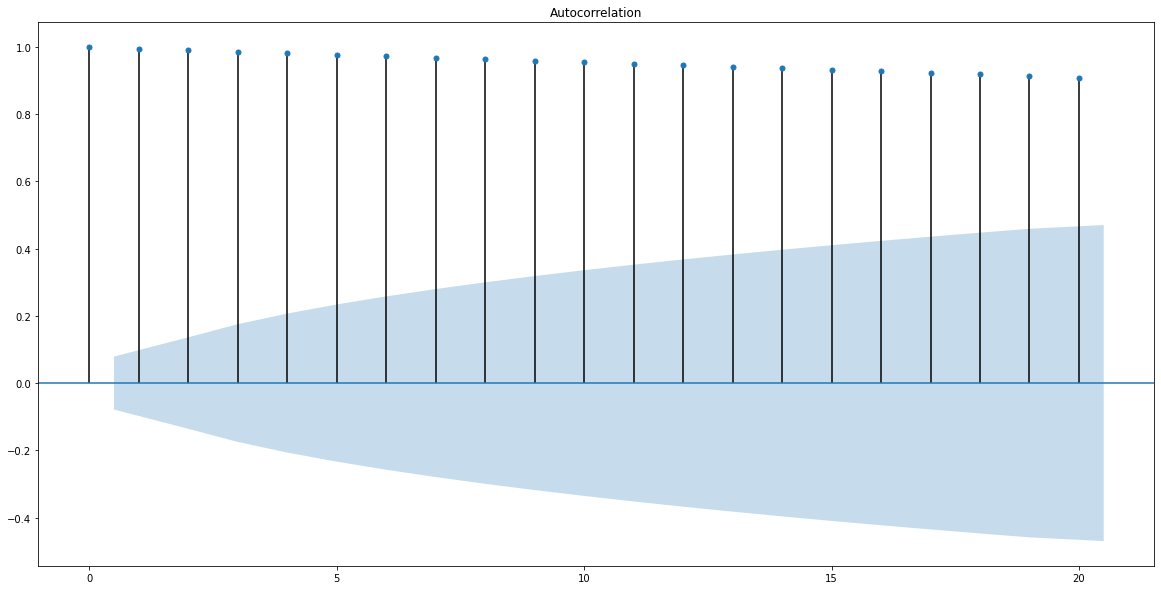

In [30]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Close"], lags=20);

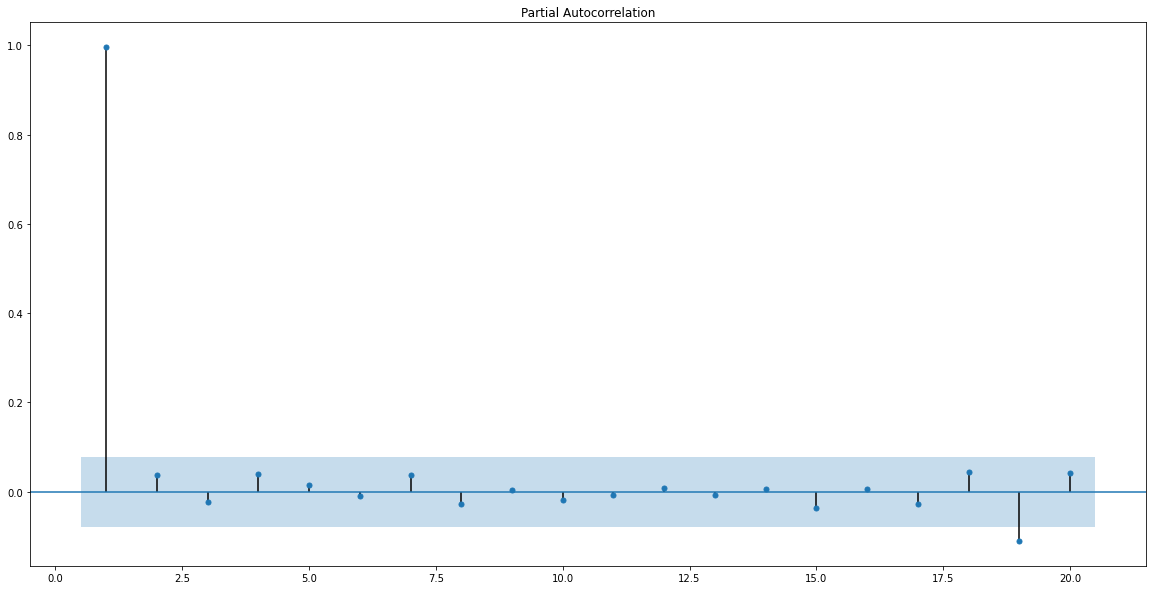

In [31]:
# Plot PACF
plot_pacf(df["Close"], zero=False, lags=20);


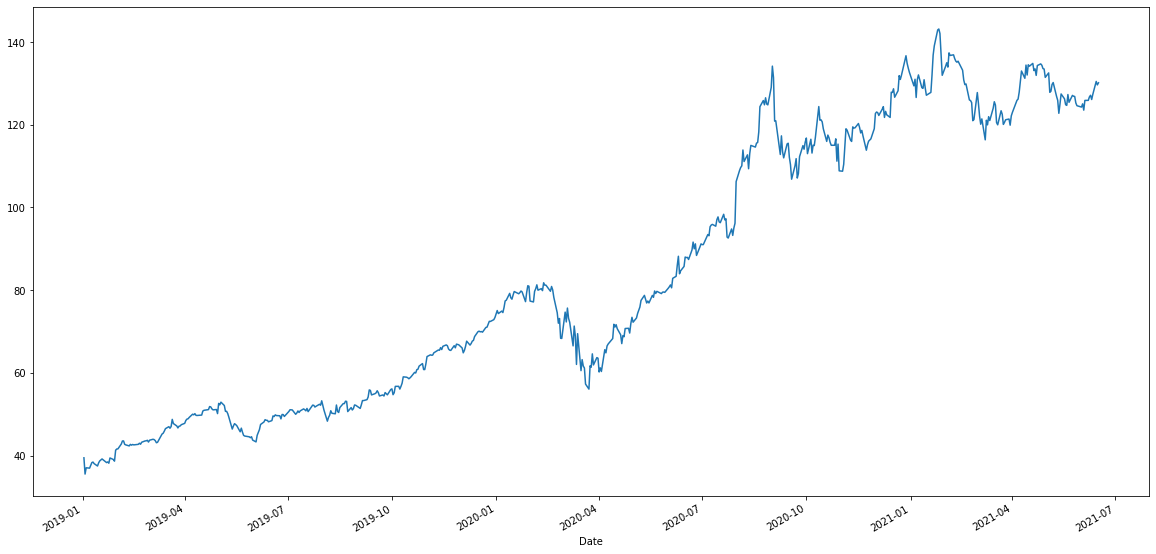

In [32]:
#Plot historical close price trend
df['Close'].plot()

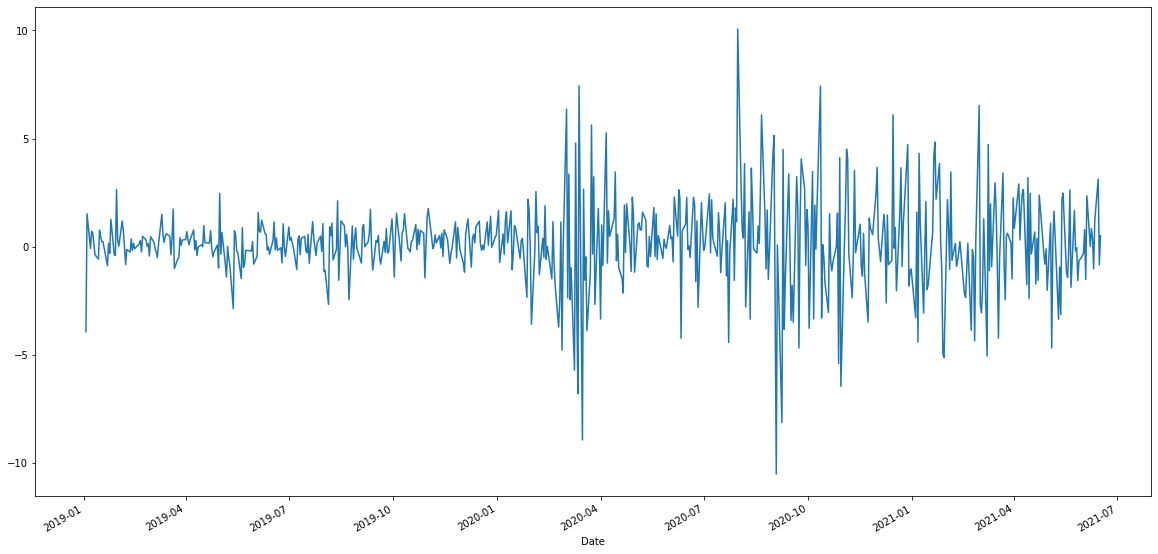

In [33]:
#Check the "Close" price difference
df['diff_Close'] = df['Close'].diff(1)
df['diff_Close'].plot()

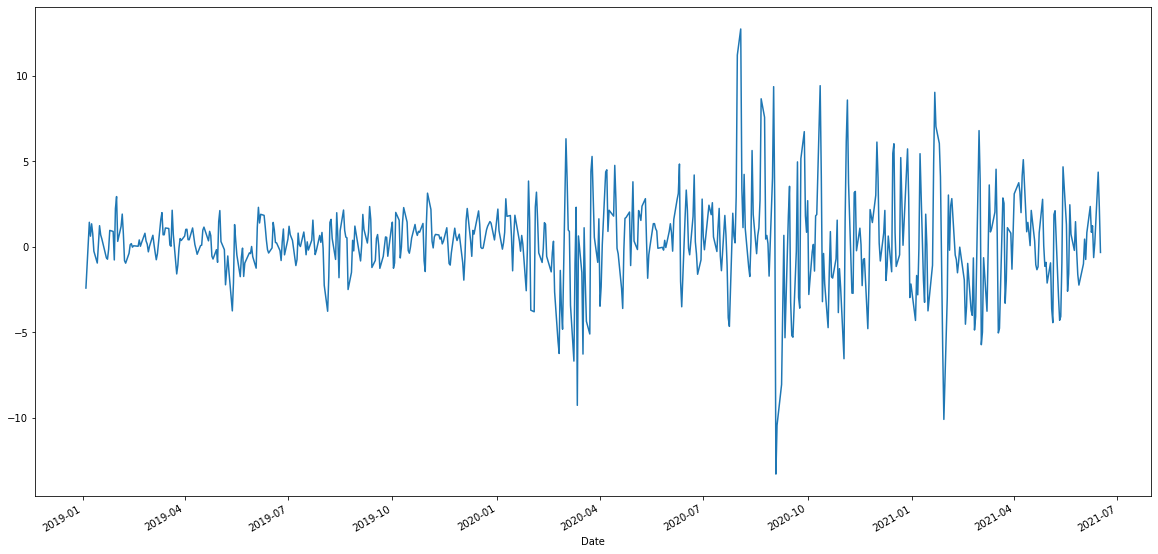

In [34]:
#Check the "Close" price difference again
df['diff_Close'] = df['Close'].diff(2)
df['diff_Close'].plot()

In [35]:
# Estimate and ARIMA Model:
model = ARIMA(df["Close"], order=(1, 1, 1))

# Fit the model
results = model.fit()

In [36]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  618
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1298.272
Method:                       css-mle   S.D. of innovations              1.977
Date:                Thu, 17 Jun 2021   AIC                           2604.543
Time:                        04:29:36   BIC                           2622.249
Sample:                             1   HQIC                          2611.427
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1473      0.072      2.060      0.040       0.007       0.288
ar.L1.D.Close    -0.3566      0.257     -1.388      0.166      -0.860       0.147
ma.L1.D.Close     0.2198      0.268      0.819      0.413      -0.306       0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8040           +0.0000j            2.8040            0.5000
MA.1           -4.5503           +0.0000j            4.5503            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
#Create dataframe of predict close price
predict_close = pd.DataFrame(results.forecast(steps=7)[0])
predict_close = predict_close.reset_index()
predict_close = predict_close[0]
predict_close

0    130.200222
1    130.382165
2    130.517133
3    130.668854
4    130.814601
5    130.962478
6    131.109596
Name: 0, dtype: float64

In [38]:
from datetime import datetime, date, time, timedelta
import datetime

# Define start date as tomorrow
tomorrow = datetime.date.today()
print('Tomorrow : ',tomorrow)

Tomorrow :  2021-06-17


In [39]:
#Create dataframe of next 7 dates 
dates = pd.date_range(start=tomorrow, periods=7).to_frame()
dates = dates.reset_index()
dates = dates[0]  
dates

0   2021-06-17
1   2021-06-18
2   2021-06-19
3   2021-06-20
4   2021-06-21
5   2021-06-22
6   2021-06-23
Name: 0, dtype: datetime64[ns]

In [40]:
# Concatenate the two DataFrames by columns and perform an inner join
predict_7days = pd.concat([dates, predict_close], axis="columns", join="inner")
predict_7days

,0,0
0,2021-06-17,130.200222
1,2021-06-18,130.382165
2,2021-06-19,130.517133
3,2021-06-20,130.668854
4,2021-06-21,130.814601
5,2021-06-22,130.962478
6,2021-06-23,131.109596


In [41]:
# Set the `columns` attribute to a new list of column names
columns = ["Date", "Predict Price"]
predict_7days.columns = columns
predict_7days

,Date,Predict Price
0,2021-06-17,130.200222
1,2021-06-18,130.382165
2,2021-06-19,130.517133
3,2021-06-20,130.668854
4,2021-06-21,130.814601
5,2021-06-22,130.962478
6,2021-06-23,131.109596


In [42]:
#Set Date as index, display dataframe of 7 Day Price Forecast
predict_7days.set_index("Date",inplace=True)
predict_7days

,Predict Price
Date,
2021-06-17,130.200222
2021-06-18,130.382165
2021-06-19,130.517133
2021-06-20,130.668854
2021-06-21,130.814601
2021-06-22,130.962478
2021-06-23,131.109596


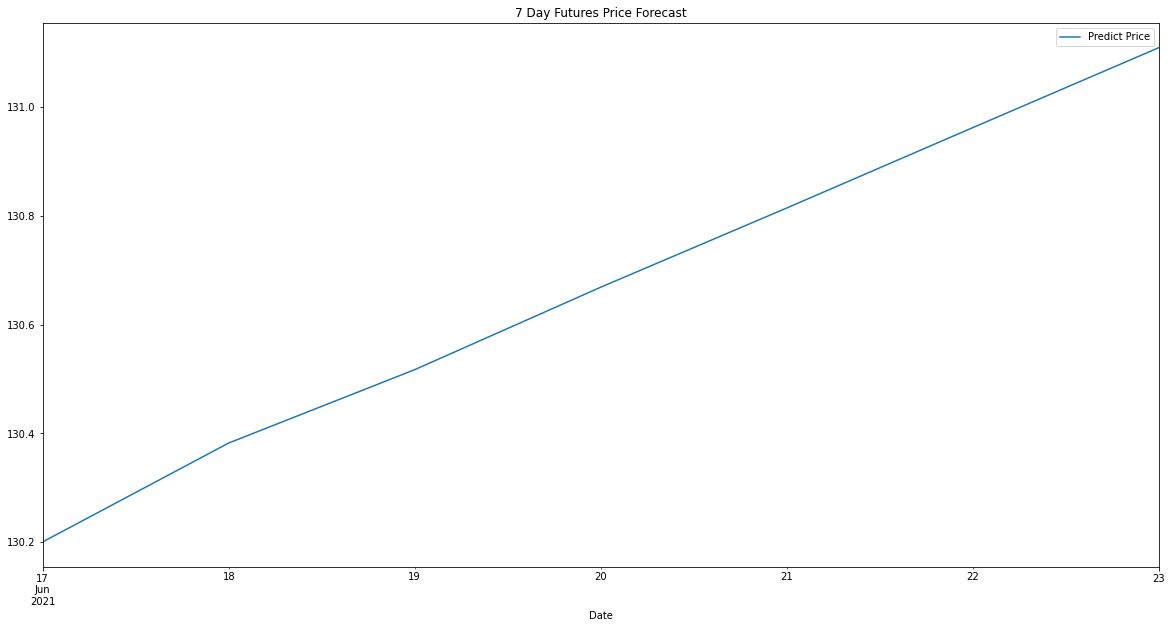

In [43]:
# Plot the 7 Day Price Forecast

#pd.DataFrame(results.forecast(steps=7)[0]).plot(title="7 Day Futures Price Forecast")
predict_7days.plot(title="7 Day Futures Price Forecast")

#Model 3 Forecasting the Stock Price using Prophet

In [44]:
#Define new dataframe
df_prophet = df['Close']
df_prophet.head()

Date
2019-01-02    39.480000
2019-01-03    35.547501
2019-01-04    37.064999
2019-01-07    36.982498
2019-01-08    37.687500
Name: Close, dtype: float64

In [45]:
#Reset Index
df_prophet = df_prophet.reset_index()
df_prophet.head()

,Date,Close
0,2019-01-02,39.480000
1,2019-01-03,35.547501
2,2019-01-04,37.064999
3,2019-01-07,36.982498
4,2019-01-08,37.687500


In [46]:
# Use the `rename` method to change the name of the columns
df_prophet = df_prophet.rename(columns={
    "Date": "ds",
    "Close": "y"
})

In [47]:
#Display new dataframe
df_prophet.head()

,ds,y
0,2019-01-02,39.480000
1,2019-01-03,35.547501
2,2019-01-04,37.064999
3,2019-01-07,36.982498
4,2019-01-08,37.687500


In [48]:
# Fit Prophet model
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
# Forecast future 14 days
future = m.make_future_dataframe(periods=14)
future.tail(14)

,ds
619,2021-06-17
620,2021-06-18
621,2021-06-19
622,2021-06-20
623,2021-06-21
624,2021-06-22
625,2021-06-23
626,2021-06-24
627,2021-06-25
628,2021-06-26


In [50]:
# Dispaly forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
619,2021-06-17,130.017255,126.145380,133.930665
620,2021-06-18,130.197968,126.249555,134.255817
621,2021-06-19,138.406038,134.572978,142.531137
622,2021-06-20,138.641500,134.618259,142.447450
623,2021-06-21,130.997710,127.026538,134.889591
624,2021-06-22,131.228047,127.130458,134.979638
625,2021-06-23,131.562867,127.776928,135.699029
626,2021-06-24,131.531398,127.579450,135.507387
627,2021-06-25,131.592330,127.759634,135.664292
628,2021-06-26,139.674086,135.589854,143.753410


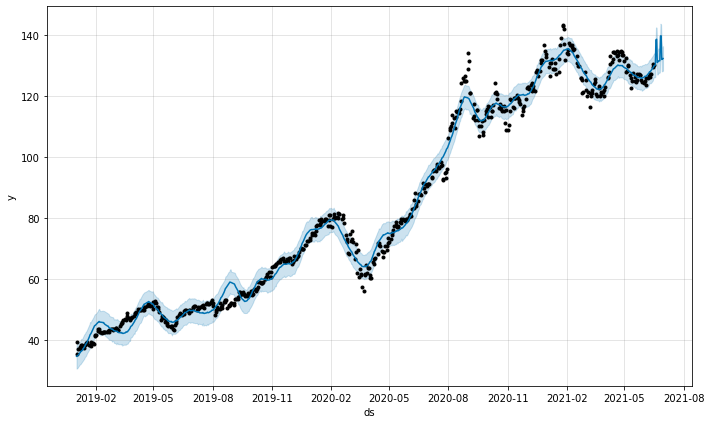

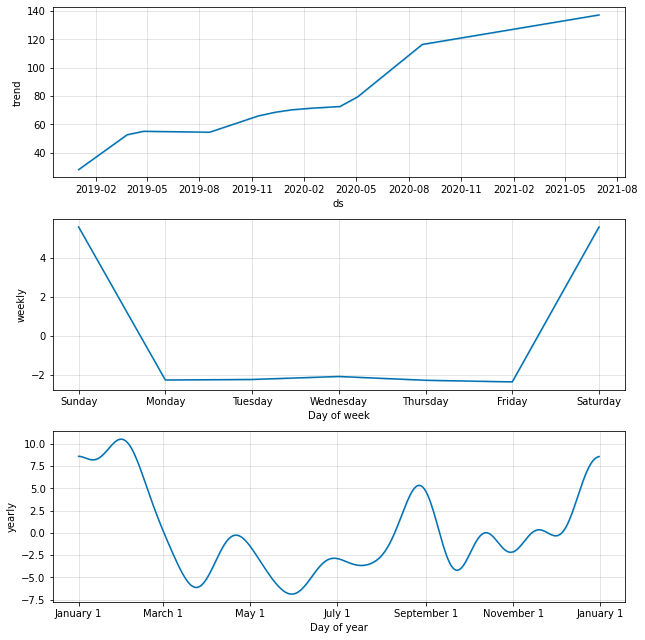

In [51]:
# Plot forecast
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

Compare Prediciton Results 

In [52]:
PREDICTIONS_FUTURE = PREDICTIONS_FUTURE.iloc[1:]
PREDICTIONS_FUTURE

,Close
2021-06-17,122.444374
2021-06-18,122.130791
2021-06-19,121.866905
2021-06-20,121.607590
2021-06-21,121.408875
2021-06-22,121.469139


In [53]:
#create new dataframe of prothet prediction result
prothet_df = forecast[['ds', 'yhat']].tail(14)
prothet_df.set_index("ds",inplace=True)
prothet_df = prothet_df.iloc[:6]
prothet_df

,yhat
ds,
2021-06-17,130.017255
2021-06-18,130.197968
2021-06-19,138.406038
2021-06-20,138.641500
2021-06-21,130.997710
2021-06-22,131.228047


In [54]:
#create a new dataframe of arima prediction result
#arima_df = predict_7days['Predict Price']
arima_df = predict_7days
arima_df = arima_df.iloc[:6]
arima_df

,Predict Price
Date,
2021-06-17,130.200222
2021-06-18,130.382165
2021-06-19,130.517133
2021-06-20,130.668854
2021-06-21,130.814601
2021-06-22,130.962478


In [55]:
#concat two dataframes 
compare_df = pd.concat(
    [PREDICTIONS_FUTURE,arima_df, prothet_df], axis="columns", join="inner"
)
compare_df

,Close,Predict Price,yhat
2021-06-17,122.444374,130.200222,130.017255
2021-06-18,122.130791,130.382165,130.197968
2021-06-19,121.866905,130.517133,138.406038
2021-06-20,121.607590,130.668854,138.641500
2021-06-21,121.408875,130.814601,130.997710
2021-06-22,121.469139,130.962478,131.228047


In [56]:
# Use the `rename` method to change the name of the columns
compare_df = compare_df.rename(columns={
    "Close":"LSTM",
    "Predict Price": "ARIMA",
    "yhat": "Prophet"
})
compare_df

,LSTM,ARIMA,Prophet
2021-06-17,122.444374,130.200222,130.017255
2021-06-18,122.130791,130.382165,130.197968
2021-06-19,121.866905,130.517133,138.406038
2021-06-20,121.607590,130.668854,138.641500
2021-06-21,121.408875,130.814601,130.997710
2021-06-22,121.469139,130.962478,131.228047


In [57]:
#Display latest stock Close price
df['Close'].tail()

Date
2021-06-10    126.110001
2021-06-11    127.349998
2021-06-14    130.479996
2021-06-15    129.639999
2021-06-16    130.149994
Name: Close, dtype: float64

#Model 4 Predict Stock Prices Change using Random Forest

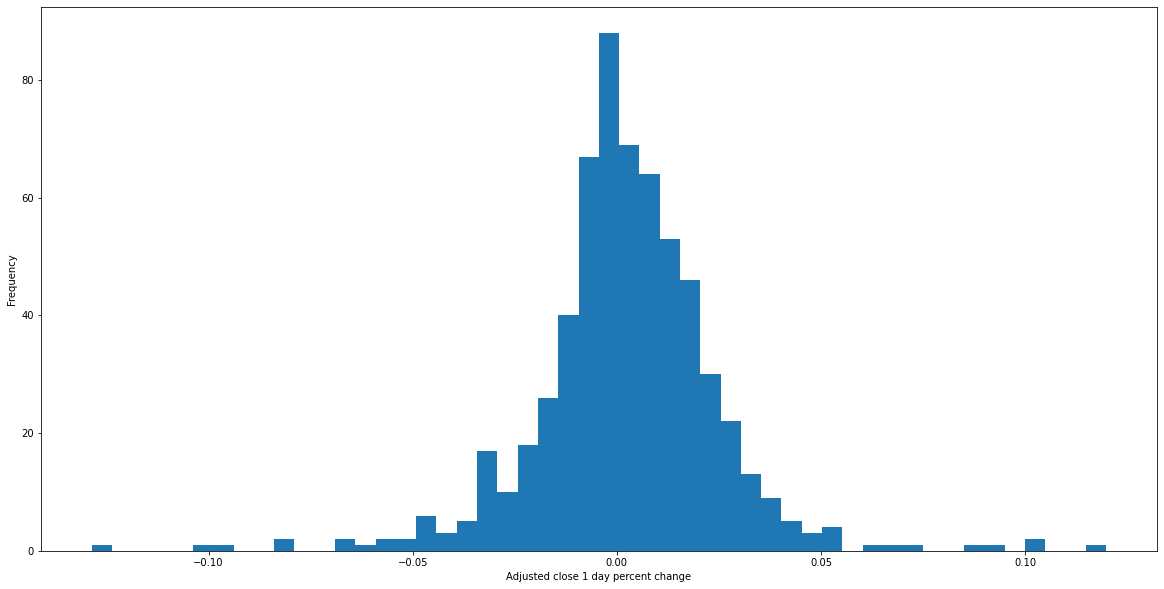

In [58]:
#plot 1-day percentage change of adjusted close price in a histogram
df['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [59]:
#Create an empty list to hold the feature names.
feature_names = []

#In a for loop, use the ta-lib library SMA and RSI methods to calculate the SMA-14, SMA-30, SMA-50, & SMA-200 and also RSI-14, RSI-30, RSI-50, & RSI-200.
for n in [14, 30, 50, 200]:
    df['ma' + str(n)] = talib.SMA(df['Adj Close'].values, timeperiod=n)
    df['rsi' + str(n)] = talib.RSI(df['Adj Close'].values, timeperiod=n)

#Append the moving average and rsi variable names to the feature_names list.
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [60]:
#use the dataframe pct_change method again to calculate the daily volume change percentage and add the volume feature name to the list.
df['Volume_1d_change'] = df['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [61]:
# shift price values forward to the next 7 indexes
df['7d_future_close'] = df['Adj Close'].shift(-7)
# 7-days future close price change percentage.
df['7d_close_future_pct'] = df['7d_future_close'].pct_change(7)

In [62]:
#Use the dropna method to remove all the null values from the dataframe
df.dropna(inplace=True)

# Assign feature_names list to variable X
X = df[feature_names]
# Assign 7-day future close price percentage column to variable y
y = df['7d_close_future_pct']

#Set training size to 85% of the entire dataset.
train_size = int(0.85 * y.shape[0])

#Assign the first 85% of the feature values and target values to X_train and y_train, respectively.
X_train = X[:train_size]
y_train = y[:train_size]

#Assign the last 15% of the feature values and target values to X_test and y_test, respectively.
X_test = X[train_size:]
y_test = y[train_size:]

In [63]:
#Set a dictionary of parameters that we intend to tweak our random forest model. 
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}

#Create an empty list to hold the values test score for different parameter sets.
test_scores = []

#Create a scikit-learn RandomForestRegressor object.
rf_model = RandomForestRegressor()


#Use a for-loop to iterate through the parameter value in the grid dictionary 
for g in ParameterGrid(grid):
#apply the parameter set to the random forest model using the set_params method
    rf_model.set_params(**g) 
#fit the model with the training set, X_train & y_train.
    rf_model.fit(X_train, y_train)
#Fetch the test set to the score method and the resulting score is appended to the test_scores list.
    test_scores.append(rf_model.score(X_test, y_test))

#Use the NumPy argmax method to get the index of the highest test score from the list
best_index = np.argmax(test_scores)
#use the index to display the best test score and parameter set.
print(test_scores[best_index], ParameterGrid(grid)[best_index])

0.06103722520360122 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


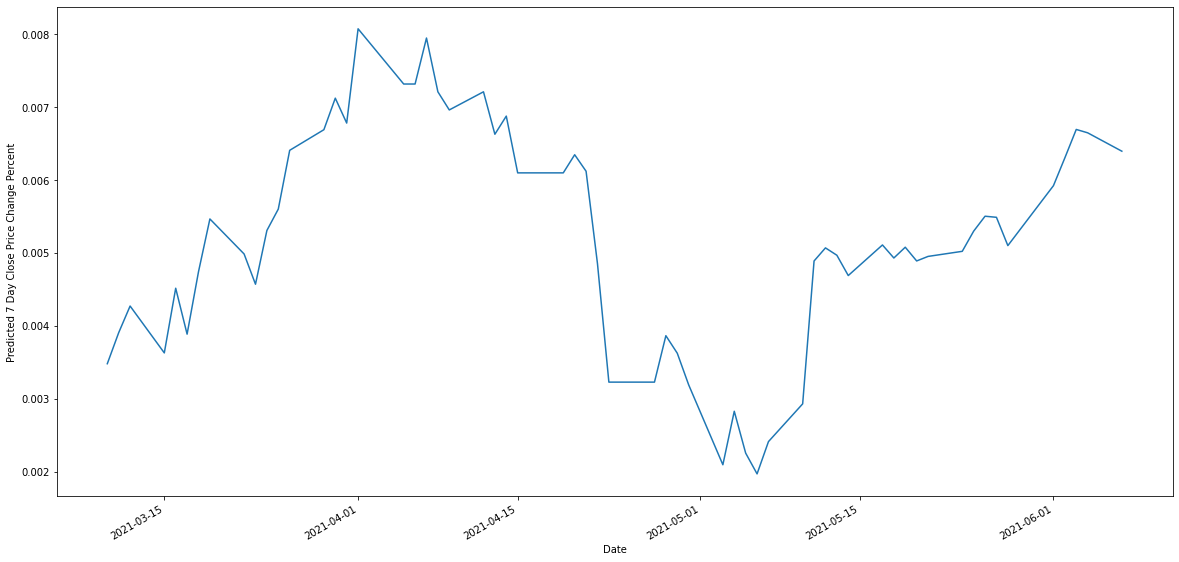

In [64]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 7 Day Close Price Change Percent")
plt.show()

In [65]:
y_pred_series

Date
2021-03-10    0.003480
2021-03-11    0.003906
2021-03-12    0.004271
2021-03-15    0.003628
2021-03-16    0.004515
                ...   
2021-06-01    0.005921
2021-06-02    0.006302
2021-06-03    0.006691
2021-06-04    0.006645
2021-06-07    0.006393
Length: 62, dtype: float64

In [66]:
#Model evaluation
#Use the scikit-learn metrics module to calculate the MAE, MSE, and RMSE and then print them out.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.026252320416124835
Mean Squared Error: 0.001207318544738171
Root Mean Squared Error: 0.034746489675047336


we built this model to estimate the percentage of the price change for a stock based on the recent price movement reflected by the moving average, RSI, and volumes. This estimation of the price change percentage can help us to plan for our investment strategy to reduce the risk.

Conbine historical close price with ARIMA predict close price

In [67]:
#Origal Close Price
close_hist = df['Close']
close_hist.tail()

Date
2021-06-01    124.279999
2021-06-02    125.059998
2021-06-03    123.540001
2021-06-04    125.889999
2021-06-07    125.900002
Name: Close, dtype: float64

In [68]:
#Display ARIMA predition
predict_7days = predict_7days["Predict Price"]
predict_7days

Date
2021-06-17    130.200222
2021-06-18    130.382165
2021-06-19    130.517133
2021-06-20    130.668854
2021-06-21    130.814601
2021-06-22    130.962478
2021-06-23    131.109596
Name: Predict Price, dtype: float64

In [69]:
#Concat two dataframes
closehis_and_predict7days = pd.concat(
    [close_hist, predict_7days], axis="rows", join="inner"
)
closehis_and_predict7days

Date
2019-10-17     58.820000
2019-10-18     59.102501
2019-10-21     60.127499
2019-10-22     59.990002
2019-10-23     60.794998
                 ...    
2021-06-19    130.517133
2021-06-20    130.668854
2021-06-21    130.814601
2021-06-22    130.962478
2021-06-23    131.109596
Length: 419, dtype: float64

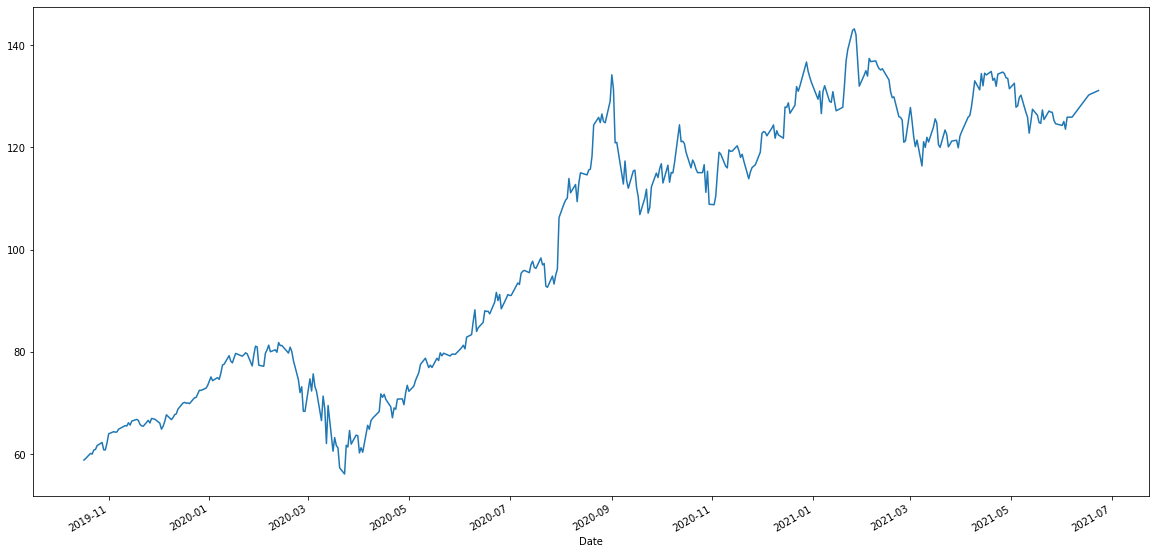

In [70]:
#Plot
closehis_and_predict7days.plot()

#Bollinger Band trading signal 

In [71]:
# Add the column name
closehis_and_predict7days = pd.DataFrame(closehis_and_predict7days,columns = ['Close'])
closehis_and_predict7days

,Close
Date,
2019-10-17,58.820000
2019-10-18,59.102501
2019-10-21,60.127499
2019-10-22,59.990002
2019-10-23,60.794998
...,...
2021-06-19,130.517133
2021-06-20,130.668854
2021-06-21,130.814601


In [72]:
df =closehis_and_predict7days
df

,Close
Date,
2019-10-17,58.820000
2019-10-18,59.102501
2019-10-21,60.127499
2019-10-22,59.990002
2019-10-23,60.794998
...,...
2021-06-19,130.517133
2021-06-20,130.668854
2021-06-21,130.814601


In [73]:
# Calculate rolling mean, rollingstd
df['MA20'] = df["Close"].rolling(20).mean()
df['20dSTD'] = df["Close"].rolling(20).std()

#Calculate rolling upper, rollng lower
df['Upper_BB'] = df['MA20'] + (df['20dSTD'] * 2)
df['Lower_BB'] = df['MA20'] - (df['20dSTD'] * 2)

df.tail()

,Close,MA20,20dSTD,Upper_BB,Lower_BB
Date,,,,,
2021-06-19,130.517133,126.373975,2.024549,130.423073,122.324878
2021-06-20,130.668854,126.658918,2.209169,131.077257,122.240580
2021-06-21,130.814601,126.827148,2.393038,131.613225,122.041072
2021-06-22,130.962478,127.061772,2.559765,132.181303,121.942242
2021-06-23,131.109596,127.374752,2.655970,132.686693,122.062812


Text(0, 0.5, 'Price')

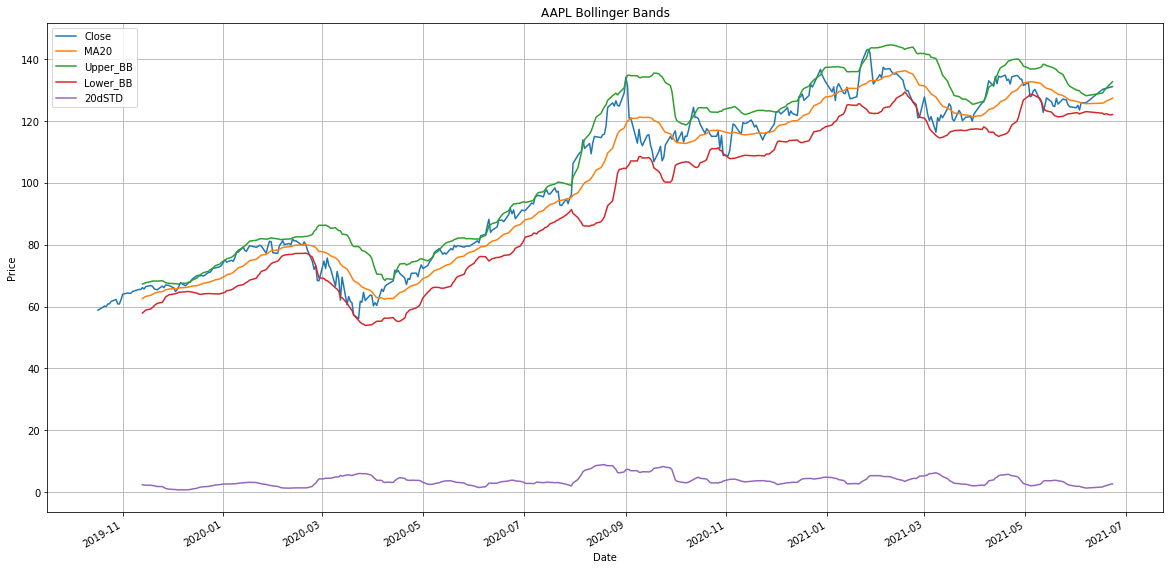

In [74]:
#Plot Bollinger Bands
df[['Close','MA20','Upper_BB','Lower_BB',"20dSTD"]].plot(figsize=(20, 10))
plt.grid(True)
plt.title(ticker + ' Bollinger Bands')
plt.axis('tight')
plt.ylabel('Price')

In [75]:
#Define data
data=df.Close

In [76]:
# Creating the Trading Strategy, define buy/sell signal
def implement_bb_strategy(data, Lower_BB, Upper_BB):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > Lower_BB[i-1] and data[i] < Lower_BB[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < Upper_BB[i-1] and data[i] > Upper_BB[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['Lower_BB'], df['Upper_BB'])


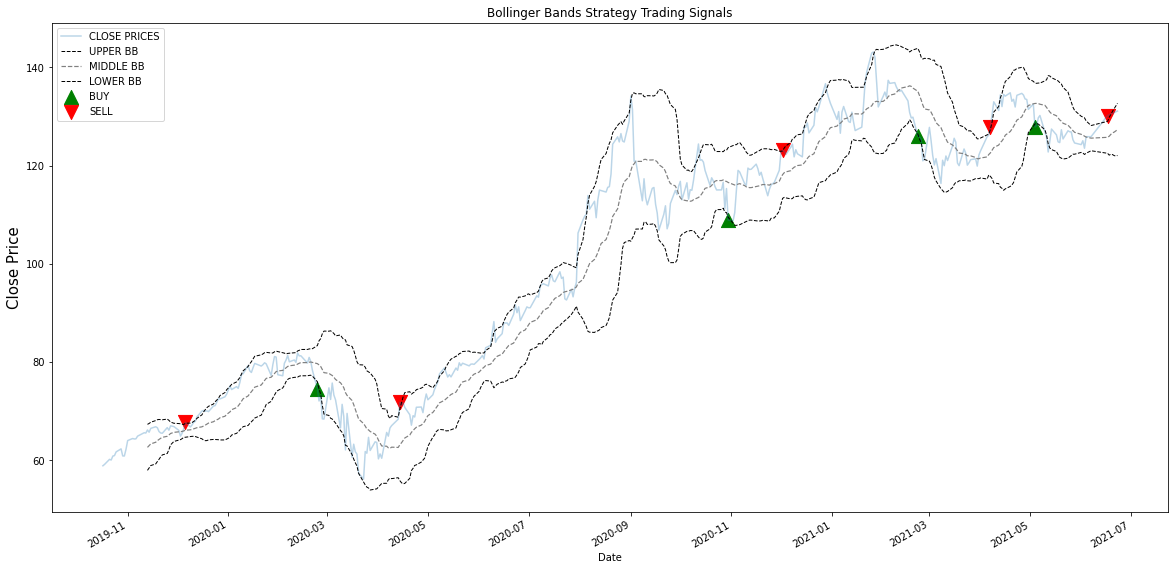

In [77]:
# Set the plot
plt.figure(figsize=(20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
df['Upper_BB'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['MA20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['Lower_BB'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.ylabel('Close Price', fontsize = 15 )
plt.title('Bollinger Bands Strategy Trading Signals')
plt.legend(loc = 'upper left')
plt.show()

#Moving Average Crossover trading signal

In [78]:
# Set the short window and long windows
short_window = 20
long_window = 50

# Generate the short and long moving averages (20 and 50 days, respectively)
df["20_SMA"] = df["Close"].rolling(window=short_window,min_periods =1).mean()
df["50_SMA"] = df["Close"].rolling(window=long_window,min_periods =1).mean()
df["Signal"] = 0.0

# Generate the trading signal 0 or 1,
# where 0 is when the SMA20 is under the SMA50, and
# where 1 is when the SMA20 is higher (or crosses over) the SMA50
df["Signal"][short_window:] = np.where(
    df["20_SMA"][short_window:] > df["50_SMA"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
df["Position"] = df["Signal"].diff()
df.tail()

,Close,MA20,20dSTD,Upper_BB,Lower_BB,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,
2021-06-19,130.517133,126.373975,2.024549,130.423073,122.324878,126.373975,128.833391,0.0,0.0
2021-06-20,130.668854,126.658918,2.209169,131.077257,122.240580,126.658918,129.003768,0.0,0.0
2021-06-21,130.814601,126.827148,2.393038,131.613225,122.041072,126.827148,129.160060,0.0,0.0
2021-06-22,130.962478,127.061772,2.559765,132.181303,121.942242,127.061772,129.261309,0.0,0.0
2021-06-23,131.109596,127.374752,2.655970,132.686693,122.062812,127.374752,129.359301,0.0,0.0


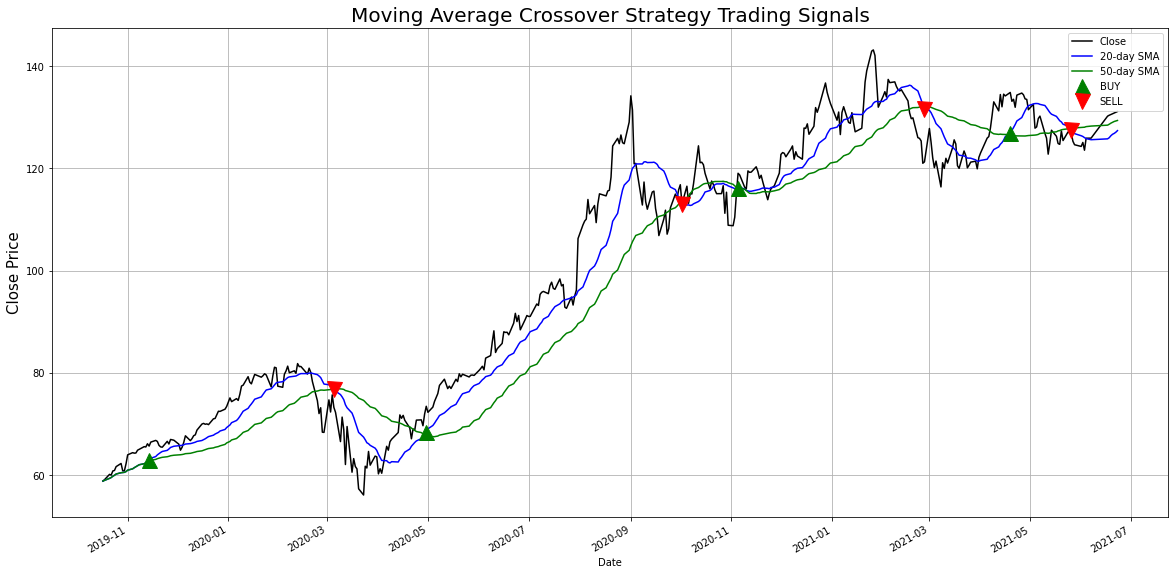

In [79]:
# plot ‘buy’ and 'sell' signals
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['20_SMA'].plot(color ='b',label = '20-day SMA') 
df['50_SMA'].plot(color ='g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['20_SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['20_SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Close Price', fontsize = 15 )
plt.title('Moving Average Crossover Strategy Trading Signals', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

#References:


1.   [Data Project - Stock Market Analysis](https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm)
2.   Algorithmic Trading with Bollinger Bands in Python[link text](https://medium.com/codex/algorithmic-trading-with-bollinger-bands-in-python-1b0a00c9ef99)
3.  Generating Trade Signals using Moving Average(MA) Crossover Strategy — A Python implementation[link text](https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a)







